In [ ]:
# In this script I want to see the patterns of Kd1 vs Kd2 in real PDB structures. 
# I had previously looked at all the PDB structures and recorded BSASA for those which had a stacked trimer structure
# Name: Leo Lagunes and Paige M.
# Date: 02/07/23 

# Last update: 03/13/23

# IMPORTANT NOTE: It is possible that since the structures were identified as stacked trimers by hand, there could be some 
# errors - subjective method. 

In [1]:
# ---------------------------------------------------
# --- packages to use ---
# ---------------------------------------------------

# First we need to import all of the packages we will be using!\n",
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math
from scipy.integrate import solve_ivp
import seaborn as sns # for the heatmaps
from datetime import date # to print date
from datetime import datetime
from matplotlib.ticker import LogLocator
import matplotlib
import pandas as pd
import csv
import random 

print('All packages loaded!')

All packages loaded!


In [2]:
# ---------------------------------------------------
# --- LIST OF FUNCTIONS ---
# ---------------------------------------------------

# All functions necessary are in this cell
# ===== get all stacked rings === 
def getSR(filename):
    # This function will return a list of all the stacked trimers
    stacked_trimers_all = [] # list containing all the PDB codes, Kd1 and Kd2 for the stacked rings 
    with open(filename, 'r') as csvfile: # --- Load dataset (.csv) ---
        datareader = csv.reader(csvfile)
        # --- extract only the stacked trimers --- 
        for row in datareader: # for each line, check if KD1 and KD2 have numeric entries (those are the stacked rings)
            if row[1] != 'na' and row[1] != 'na ': # 'na' was the notation I used for a not-applicable structure that is not a stacked ring
                # save the PDB code, Kd1 and Kd2 values
                if row[0] != 'PDB': # remove header
                    #print(row)
                    addItem = [row[0],float(row[1]),float(row[2])]
                    stacked_trimers_all.append(addItem)
                #print(addItem)
    return stacked_trimers_all

# ---------------------------------------------------
# --- EJD Eqns for stacked trimer ---   
# ---------------------------------------------------
def keff(i,j):
    # calculate the k_effective value given the i,j indices and the kd's (binding affinities)
    ℯ = math.e
    #kd1 = kds[0]; kd2 = kds[1]
    keff= kOn*(kd1**i)*(kd2**j)*ℯ**(-(i+j-1)*9/0.6)
    
    return keff

def stackedTrimer(states, t):
    #x0Val = paramvaluesList[0] # initial condition for x1 
    x = states
    # list of ode's
    dx_0 = - 2*kOn*0.5*x[0]*x[0] + 1*keff(1,0)*x[1] - 2*kOn*0.5*x[0]*x[0] + 1*keff(1,0)*x[1] - 1*kOn*0.5*x[0]*x[0] + 1*keff(0,1)*x[2] - 1*kOn*0.5*x[0]*x[0] + 1*keff(0,1)*x[2] - 1*kOn*1*x[0]*x[1] + 3*keff(2,0)*x[3] - 1*kOn*1*x[0]*x[1] + 1*keff(0,1)*x[4] - 1*kOn*1*x[0]*x[1] + 1*keff(0,1)*x[5] - 2*kOn*1*x[0]*x[2] + 1*keff(1,0)*x[5] - 2*kOn*1*x[0]*x[2] + 1*keff(1,0)*x[4] - 3*kOn*1*x[0]*x[3] + 1*keff(0,1)*x[6] - 1*kOn*1*x[0]*x[4] + 1*keff(2,0)*x[6] - 1*kOn*1*x[0]*x[4] + 2*keff(1,0)*x[7] - 1*kOn*1*x[0]*x[4] + 2*keff(1,1)*x[8] - 1*kOn*1*x[0]*x[5] + 1*keff(2,0)*x[6] - 1*kOn*1*x[0]*x[5] + 2*keff(1,1)*x[8] - 1*kOn*1*x[0]*x[5] + 2*keff(1,0)*x[9] - 2*kOn*1*x[0]*x[6] + 2*keff(1,1)*x[10] - 2*kOn*1*x[0]*x[7] + 1*keff(2,1)*x[10] - 2*kOn*1*x[0]*x[8] + 1*keff(2,0)*x[10] - 2*kOn*1*x[0]*x[9] + 1*keff(2,1)*x[10] - 1*kOn*1*x[0]*x[10] + 6*keff(2,1)*x[11] + Q - δ*x[0] 
    dx_1 = + 2*kOn*0.5*x[0]*x[0] - 1*keff(1,0)*x[1] - 1*kOn*1*x[0]*x[1] + 3*keff(2,0)*x[3] - 1*kOn*1*x[0]*x[1] + 1*keff(0,1)*x[4] - 1*kOn*1*x[0]*x[1] + 1*keff(0,1)*x[5] - 1*kOn*0.5*x[1]*x[1] + 1*keff(0,2)*x[8] - 1*kOn*0.5*x[1]*x[1] + 1*keff(0,2)*x[8] - 1*kOn*0.5*x[1]*x[1] + 1*keff(0,1)*x[9] - 1*kOn*0.5*x[1]*x[1] + 1*keff(0,1)*x[9] - 1*kOn*0.5*x[1]*x[1] + 1*keff(0,1)*x[7] - 1*kOn*0.5*x[1]*x[1] + 1*keff(0,1)*x[7] - 2*kOn*1*x[1]*x[2] + 1*keff(2,0)*x[6] - 3*kOn*1*x[1]*x[3] + 1*keff(0,2)*x[10] - 1*kOn*1*x[1]*x[4] + 1*keff(2,1)*x[10] - 1*kOn*1*x[1]*x[5] + 1*keff(2,1)*x[10] - 1*kOn*1*x[1]*x[6] + 6*keff(2,2)*x[11]  -  δ*x[1]
    dx_2 = + 1*kOn*0.5*x[0]*x[0] - 1*keff(0,1)*x[2] - 2*kOn*1*x[0]*x[2] + 1*keff(1,0)*x[5] - 2*kOn*1*x[0]*x[2] + 1*keff(1,0)*x[4] - 2*kOn*1*x[1]*x[2] + 1*keff(2,0)*x[6] - 4*kOn*0.5*x[2]*x[2] + 1*keff(2,0)*x[8] - 4*kOn*0.5*x[2]*x[2] + 1*keff(2,0)*x[8] - 2*kOn*1*x[2]*x[4] + 1*keff(3,0)*x[10] - 2*kOn*1*x[2]*x[5] + 1*keff(3,0)*x[10] - 2*kOn*1*x[2]*x[8] + 3*keff(4,0)*x[11]  - δ*x[2]
    dx_3 = + 1*kOn*1*x[0]*x[1] - 3*keff(2,0)*x[3] - 3*kOn*1*x[0]*x[3] + 1*keff(0,1)*x[6] - 3*kOn*1*x[1]*x[3] + 1*keff(0,2)*x[10] - 3*kOn*0.5*x[3]*x[3] + 1*keff(0,3)*x[11] - 3*kOn*0.5*x[3]*x[3] + 1*keff(0,3)*x[11]  - δ*x[3]
    dx_4 = + 1*kOn*1*x[0]*x[1] - 1*keff(0,1)*x[4] + 2*kOn*1*x[0]*x[2] - 1*keff(1,0)*x[4] - 1*kOn*1*x[0]*x[4] + 1*keff(2,0)*x[6] - 1*kOn*1*x[0]*x[4] + 2*keff(1,0)*x[7] - 1*kOn*1*x[0]*x[4] + 2*keff(1,1)*x[8] - 1*kOn*1*x[1]*x[4] + 1*keff(2,1)*x[10] - 2*kOn*1*x[2]*x[4] + 1*keff(3,0)*x[10] - 1*kOn*0.5*x[4]*x[4] + 3*keff(4,1)*x[11] - 1*kOn*0.5*x[4]*x[4] + 3*keff(4,1)*x[11]  - δ*x[4]
    dx_5 = + 1*kOn*1*x[0]*x[1] - 1*keff(0,1)*x[5] + 2*kOn*1*x[0]*x[2] - 1*keff(1,0)*x[5] - 1*kOn*1*x[0]*x[5] + 1*keff(2,0)*x[6] - 1*kOn*1*x[0]*x[5] + 2*keff(1,1)*x[8] - 1*kOn*1*x[0]*x[5] + 2*keff(1,0)*x[9] - 1*kOn*1*x[1]*x[5] + 1*keff(2,1)*x[10] - 2*kOn*1*x[2]*x[5] + 1*keff(3,0)*x[10] - 1*kOn*0.5*x[5]*x[5] + 3*keff(4,1)*x[11] - 1*kOn*0.5*x[5]*x[5] + 3*keff(4,1)*x[11]  - δ*x[5]
    dx_6 = + 3*kOn*1*x[0]*x[3] - 1*keff(0,1)*x[6] + 1*kOn*1*x[0]*x[4] - 1*keff(2,0)*x[6] + 1*kOn*1*x[0]*x[5] - 1*keff(2,0)*x[6] - 2*kOn*1*x[0]*x[6] + 2*keff(1,1)*x[10] + 2*kOn*1*x[1]*x[2] - 1*keff(2,0)*x[6] - 1*kOn*1*x[1]*x[6] + 6*keff(2,2)*x[11]  - δ*x[6]
    dx_7 = + 1*kOn*1*x[0]*x[4] - 2*keff(1,0)*x[7] - 2*kOn*1*x[0]*x[7] + 1*keff(2,1)*x[10] + 1*kOn*0.5*x[1]*x[1] - 1*keff(0,1)*x[7]  - δ*x[7]
    dx_8 = + 1*kOn*1*x[0]*x[4] - 2*keff(1,1)*x[8] + 1*kOn*1*x[0]*x[5] - 2*keff(1,1)*x[8] - 2*kOn*1*x[0]*x[8] + 1*keff(2,0)*x[10] + 1*kOn*0.5*x[1]*x[1] - 1*keff(0,2)*x[8] + 4*kOn*0.5*x[2]*x[2] - 1*keff(2,0)*x[8] - 2*kOn*1*x[2]*x[8] + 3*keff(4,0)*x[11]  - δ*x[8]
    dx_9 = + 1*kOn*1*x[0]*x[5] - 2*keff(1,0)*x[9] - 2*kOn*1*x[0]*x[9] + 1*keff(2,1)*x[10] + 1*kOn*0.5*x[1]*x[1] - 1*keff(0,1)*x[9]  - δ*x[9]
    dx_10 = + 2*kOn*1*x[0]*x[6] - 2*keff(1,1)*x[10] + 2*kOn*1*x[0]*x[7] - 1*keff(2,1)*x[10] + 2*kOn*1*x[0]*x[8] - 1*keff(2,0)*x[10] + 2*kOn*1*x[0]*x[9] - 1*keff(2,1)*x[10] - 1*kOn*1*x[0]*x[10] + 6*keff(2,1)*x[11] + 3*kOn*1*x[1]*x[3] - 1*keff(0,2)*x[10] + 1*kOn*1*x[1]*x[4] - 1*keff(2,1)*x[10] + 1*kOn*1*x[1]*x[5] - 1*keff(2,1)*x[10] + 2*kOn*1*x[2]*x[4] - 1*keff(3,0)*x[10] + 2*kOn*1*x[2]*x[5] - 1*keff(3,0)*x[10]  - δ*x[10]
    dx_11 = + 1*kOn*1*x[0]*x[10] - 6*keff(2,1)*x[11] + 1*kOn*1*x[1]*x[6] - 6*keff(2,2)*x[11] + 2*kOn*1*x[2]*x[8] - 3*keff(4,0)*x[11] + 3*kOn*0.5*x[3]*x[3] - 1*keff(0,3)*x[11] + 1*kOn*0.5*x[4]*x[4] - 3*keff(4,1)*x[11] + 1*kOn*0.5*x[5]*x[5] - 3*keff(4,1)*x[11]  - δ*x[11]
   
    states_prime = [dx_0, dx_1,dx_2,dx_3,dx_4, dx_5, dx_6,dx_7,dx_8,dx_9,dx_10,dx_11]
    
    return states_prime 

# ---------------------------------------------------
# --- Assembly Yield --- 
# ---------------------------------------------------
def calcAY24hrs(IC_1,XnTimePtsVec):
    # this function calculates the assembly yield for a time course of one species
    n=6; Xn = XnTimePtsVec;
    # --- calculate XT --- 
    # define XT as the IC of monomers (predefined)
    XT = IC_1; # print(XT)
    # --- calculate Yn ---
    Yn = n*Xn/XT;
    
    return Yn

# --------------------------------------------------------------
# --- Assembly Yield with synthesis and degradation at 24hrs --- 
# --------------------------------------------------------------
def calcAY_synthDeg2hrs(tVec,solution_mat):
    nTpts = len(tVec)
    # vectors for each species (concentration at time t vector)
    x1 = solution_mat[:,0];x2 = solution_mat[:,1];x3 = solution_mat[:,2]
    x4 = solution_mat[:,3];x5 = solution_mat[:,4];x6 = solution_mat[:,5]
    x7 = solution_mat[:,6];x8 = solution_mat[:,7];x9 = solution_mat[:,8]
    x10 = solution_mat[:,9];x11 = solution_mat[:,10];x12 = solution_mat[:,11]

    # --- calculate Xn --- 
    # we only want AY for stacked trimer x11/x12
    #timeT = nTpts-1 # index of final point
    Xn = x12[-1]
    # --- calculate XT and AY at last time point (this is the 24hr mark) --- 
    xt_val_i = 1*x1[-1]+3*x2[-1]+2*x3[-1]+3*x4[-1]+ 4*x5[-1]+3*x6[-1]+4*x7[-1]+2*x8[-1]+3*x9[-1]+ 4*x10[-1]+5*x11[-1]+6*x12[-1]
    #print("XT: ", xt_val_i)
    # --- calculate Yn --- 
    Yn_val = 6*Xn/xt_val_i
    #print("YT: ", Yn_val)
    Yn24hrs = Yn_val
    
    return Yn24hrs

# --------------------------------------------------------------
# --- BSASA in threshold rectangle --- 
# --------------------------------------------------------------
def dot_prod_with_shared_start(start, end1, end2):
#    Compute the dot product of the vectors pointing from start to end1 and end2
#    Parameters
#        start: starting point of both vectors
#        end1: end point of first vector
#        end2: end point of second vector
#    Returns
#        dot product of (end1 - start) and (end2 - start)
    dotProd = (end1[0] - start[0]) * (end2[0] - start[0]) + (end1[1] - start[1]) * (end2[1] - start[1])
    return dotProd

def is_inside_rectangle(vertices, point):
#   Given the vertices of a rectangle, determine whether a point is inside it.
#   Parameters
#        vertices: a list of tuples representing rectangle vertices in clockwise or counter-clockwise order point: a tuple representing the point to check
#    Returns
#        True if the point is inside the rectangle. False otherwise.

    return all(dot_prod_with_shared_start(vertices[i - 1], v, point) > 0 for i, v in enumerate(vertices))




# --- Today --- 
now = datetime.now(); dt_string = now.strftime("%m/%d/%Y %H:%M:%S")
today_pre = date.today()
today = today_pre.strftime("%m_%d_%y")
print("Functions ready...", dt_string)


Functions ready... 04/19/2023 14:37:33


In [4]:
# ---------------------------------------------------------
# --- EXTRACT STACKED TRIMERS FROM FILLED OUT DATASET ---
# ---------------------------------------------------------

# PLOT RATIO KD1/KD2

# --- Load dataset (.csv) ---
filename = 'BSASA_workthrough_data.csv'
stacked_trimers_all=getSR(filename)
            
# How many stacked trimers did I get?
print("Found ", len(stacked_trimers_all), ' stacked trimers in total (~44%)')
# --- prep list for plotting --- 
KD1s = []; KD2s = []; # lists to hold KD1 and KD2
all_ratios = []
for listI in stacked_trimers_all:
    KD1_item = listI[1]; KD2_item = listI[2];
    KD1s.append(KD1_item); KD2s.append(KD2_item);
    ratioVal = KD1_item/KD2_item; all_ratios.append(ratioVal)
    
print("Observed BSASA extracted on ", dt_string)

Found  1580  stacked trimers in total (~44%)
Observed BSASA extracted on  04/19/2023 14:37:33


figure saved bitch!


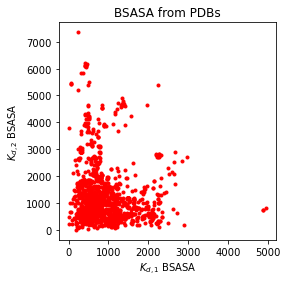

In [5]:
# ---------------------------------------------------------
# --- PLOTS ---
# ---------------------------------------------------------

# -- plot BSASA -- 

x_values1=KD1s; y_values1=KD2s;
levels = [0.4, 0.5,0.6, 0.688, 0.8, 0.95]

fig=plt.figure()
ax=fig.add_subplot(111, label="1")
#ax2=fig.add_subplot(111, label="2", frame_on=False)

ax.plot(x_values1, y_values1, 'r.')
ax.set_xlabel("$K_{d,1}$ BSASA")
ax.set_ylabel("$K_{d,2}$ BSASA")

plt.title("BSASA from PDBs"); 

# --- save final plot --- 
ax.set_aspect(1./ax.get_data_ratio())
plt.savefig('pdb_BSASA_'+today+'.eps')

print("figure saved bitch!")

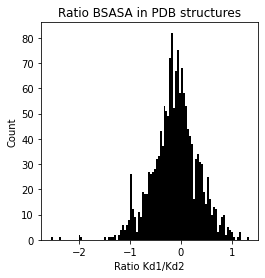

In [7]:
# --- plot KD1 vs KD2 ---
n_bins=100
fig = plt.figure()
ax = fig.add_subplot(111)

plt.hist(np.log10(all_ratios), bins = n_bins, color='black')
#plt.xlim(0, 5000); plt.ylim(0, 5000)
#plt.xscale('log')
#plt.yscale('log')

plt.title("Ratio BSASA in PDB structures"); #plt.xlabel('Kd1 BSASA'); plt.ylabel('Kd2 BSASA')
plt.xlabel('Ratio Kd1/Kd2'); plt.ylabel('Count')

# --- save final plot --- 
ax.set_aspect(1./ax.get_data_ratio())
plt.savefig('ratio_hist_BSASA_'+today+'.eps')

In [22]:
# ---------------------------------------------------------
# --- PLOTS - STATISTICAL ANALYSES ---
# ---------------------------------------------------------

# In this session, I want to do a permuation test on the observed BSASA values
nTrials = 10000; # number of times to shuffle Kd1
kd1_thr = 4000; kd2_thr = 4000; maxThres = 7000; # cutoff values for the rectangle of interest

totPoints = len(KD1s);
rect_vertices = [(kd1_thr, kd2_thr), (kd1_thr, maxThres), (maxThres, kd2_thr), (maxThres, maxThres)]
totCountInMat = []

for trial_i in range(0,nTrials): # for each trial, do permutation
    totCountIn = 0;
    # --- rearrange Kd1 --- 
    new_kd1 = random.sample(KD1s,totPoints); new_kd2 = random.sample(KD2s,totPoints); 
    # --- check how many points are in the threshold rectangle --
    for ptInd in range(0,totPoints):
        test_point= (new_kd1[ptInd],new_kd2[ptInd]);
        testIn = is_inside_rectangle(rect_vertices, test_point)
        if testIn == True:
            totCountIn+=1
        # print("the point ", test_point, " is ",  testIn)
    totCountInMat.append(totCountIn)
    
print("Done with permuation test!")

Done with permuation test!


In [23]:
tot0 = totCountInMat.count(0)


print(tot0)

48


Plot saved at  04/19/2023 14:37:33


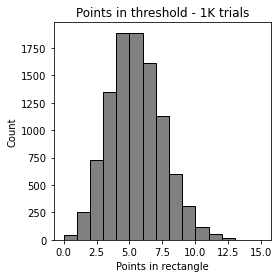

In [24]:
# --- plot distribution of points that land in the rectangle --- 
#print(totCountInMat)
fig = plt.figure()
ax = fig.add_subplot(111)

#specify bin width to use
bin_width=1

plt.hist(totCountInMat, color = 'gray', edgecolor = 'black', 
         bins=np.arange(min(totCountInMat), max(totCountInMat) + bin_width, bin_width))

plt.title("Points in threshold - 1K trials"); #plt.xlabel('Kd1 BSASA'); plt.ylabel('Kd2 BSASA')
plt.xlabel('Points in rectangle'); plt.ylabel('Count')

# --- save final plot --- 
ax.set_aspect(1./ax.get_data_ratio())
plt.savefig('percentRec_BSASA_'+today+'.eps')
plt.savefig('percentRec_BSASA_'+today+'.pdf')

print("Plot saved at ", dt_string)

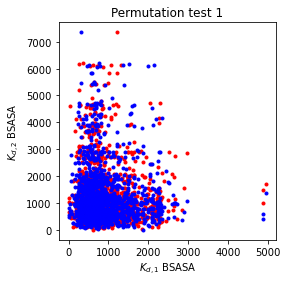

In [51]:
# --- plot KD1 vs KD2 ---
x_values1=KD1s; y_values1=KD2s;

fig=plt.figure()
ax=fig.add_subplot(111, label="1")

ax.plot(x_values1, y_values1, 'r.')
ax.plot(new_kd1, y_values1, 'b.')
ax.set_xlabel("$K_{d,1}$ BSASA")
ax.set_ylabel("$K_{d,2}$ BSASA")

plt.title("Permutation test 1"); 

# --- save final plot --- 
ax.set_aspect(1./ax.get_data_ratio())
plt.savefig('permutationTest1_BSASA_'+today+'.eps')

In [21]:
# ---------------------------------------------------------
# --- OVERLAY WITH MODEL ---
# ---------------------------------------------------------

# --- In vitro model --- 

# --- PARAMETERS ---
# List of fixed parameters
kOn = 10**6
IC_val = 4*10**-6;
δ = 0 # degradation rate parameter
Q = δ*IC_val # synthesis rate parameter
# other parameters 
tEnd = 86400 # 24hrs
tPts = 2000; t = np.linspace(0,tEnd,tPts)

print("Running in vitro model ...")

# initializations 
nKdspts=50;
minDeg_kd1=-12;maxDeg_kd1=-3; # Kd1 pts
minDeg_kd2=-12;maxDeg_kd2=-3; # Kd2 pts
mags_Kd1 = np.linspace(minDeg_kd1, maxDeg_kd1,nKdspts)
allKd1 = 10**mags_Kd1
mags_Kd2 = np.linspace(minDeg_kd2, maxDeg_kd2,nKdspts)
allKd2 = 10**mags_Kd2


kd1_kd2_AY_mat=np.zeros((nKdspts,nKdspts)); allTcs_mat = np.zeros((nKdspts,nKdspts,tPts))
# loop to solve AY for each IC 
for kd2ind in range(0,nKdspts): # for each IC 
    kd2_val=allKd2[kd2ind]; kd2 = kd2_val;
    for kd1ind in range(0,nKdspts): # for each value of kd2
        kd1_val=allKd1[kd1ind]; kd1 = kd1_val
        states_0 = [IC_val,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0]
        # Now, integrate the ODEs and put the results in \"solution\"
        solution_1 = odeint(stackedTrimer,states_0,t,rtol = 1e-12, atol = 1e-12)
        tVec = t; xStkTrm_tps_1 = solution_1[:,-1]        
        # calculate AY
        Yn_1 = calcAY24hrs(IC_val,xStkTrm_tps_1)
        # store the last AY value - since tc stops at 24hrs that's the AY at 24hrs
        AY_valStr = Yn_1[-1]; 
        kd1_kd2_AY_mat[kd2ind][kd1ind] = AY_valStr # IC on x-axis, Kd on y-axis

print("Done will all pts!")

Running in vitro model ...


KeyboardInterrupt: 

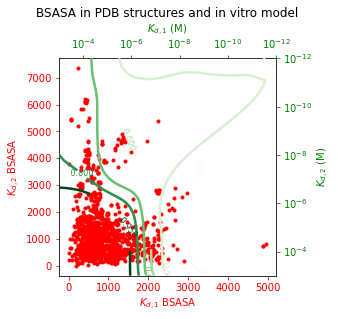

In [6]:
# ---------------------------------------------------------
# --- OVERLAY WITH MODEL ---
# ---------------------------------------------------------

x_values1=KD1s; y_values1=KD2s;AYmatPlt=kd1_kd2_AY_mat
levels = [0.4, 0.5,0.6, 0.688, 0.8, 0.95]

fig=plt.figure()
ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)

ax.plot(x_values1, y_values1, 'r.')
ax.set_xlabel("$K_{d,1}$ BSASA", color="r")
ax.set_ylabel("$K_{d,2}$ BSASA", color="r")
ax.tick_params(axis='x', colors="r")
ax.tick_params(axis='y', colors="r")

CS= ax2.contour(allKd2, allKd1, AYmatPlt, levels, 
                origin ='lower',
                cmap ='Greens',
                linewidths = 2.5,
                extent =(-1, 1, -1, 1))

ax2.clabel(CS, levels,
          inline = 1, 
          fmt ='% 1.3f',
          fontsize = 8)

ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_xscale('log'); ax2.set_yscale('log')
plt.gca().invert_yaxis();plt.gca().invert_xaxis()
ax2.set_xlabel('$K_{d,1}$ (M)', color="green") 
ax2.set_ylabel('$K_{d,2}$ (M)', color="green")       
ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right') 
ax2.tick_params(axis='x', colors="green")
ax2.tick_params(axis='y', colors="green")

plt.title("BSASA in PDB structures and in vitro model");
ax.set_aspect(1./ax.get_data_ratio());ax2.set_aspect(1./ax2.get_data_ratio())
# --- Save figure --- 
#plt.show()
plt.savefig('LL_SR_BSASA_inVitro_contours_'+today+'.eps')

In [7]:
# ---------------------------------------------------------
# --- OVERLAY WITH MODEL ---
# ---------------------------------------------------------

# --- In vivo model --- 

# --- PARAMETERS ---
# List of fixed parameters
kOn = 10**6
δ_main = 2.8*10**-4 # degradation parameter term
δ = δ_main # synthesis parameter
# IC_val = 4*10**-6
IC_val = 4*10**-8
Q = IC_val*δ
# other parameters 
tEnd = 86400 # 24hrs
t = np.linspace(0,tEnd,2000)

print("Running in vivo model ...")

nKdspts=50;
minDeg_kd1=-12;maxDeg_kd1=-3; # Kd1 pts
minDeg_kd2=-12;maxDeg_kd2=-3; # Kd2 pts

# start of function here!
mags_Kd1 = np.linspace(minDeg_kd1, maxDeg_kd1,nKdspts)
allKd1 = 10**mags_Kd1
mags_Kd2 = np.linspace(minDeg_kd2, maxDeg_kd2,nKdspts)
allKd2 = 10**mags_Kd2

kd1_kd2_AY_mat=np.zeros((nKdspts,nKdspts))
# loop to solve AY for each IC 
for kd2ind in range(0,nKdspts): # for each IC 
    kd2_val=allKd2[kd2ind]; kd2 = kd2_val;
    for kd1ind in range(0,nKdspts): # for each value of kd2
        kd1_val=allKd1[kd1ind]; kd1 = kd1_val
        states_0 = [IC_val,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0]
        # Now, integrate the ODEs and put the results in \"solution\"
        solution_1 = odeint(stackedTrimer,states_0,t,rtol = 1e-12, atol = 1e-12)
        tVec = t; xStkTrm_tps_1 = solution_1[:,-1]
        # calculate AY
        Yn_1 = calcAY_synthDeg2hrs(tVec,solution_1);
        # store the last AY value - since tc stops at 24hrs that's the AY at 24hrs
        #AY_valStr = Yn_1[-1]; 
        AY_valStr = Yn_1;
        #print("IC= " + str(icVal) + " , Kd2= " + str(kd2_val) + " , AY= " +  str(AY_valStr))
        #kd1_kd2_AY_mat[kd1ind][kd2ind] = AY_valStr # IC on x-axis, Kd on y-axis
        kd1_kd2_AY_mat[kd2ind][kd1ind] = AY_valStr
        
print("Done will all pts!")


Running in vivo model ...
Done will all pts!


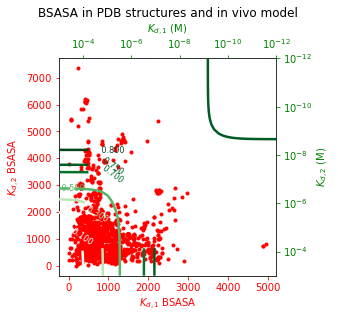

In [8]:
# ---------------------------------------------------------
# --- OVERLAY WITH MODEL ---
# ---------------------------------------------------------

x_values1=KD1s; y_values1=KD2s;AYmatPlt=kd1_kd2_AY_mat
levels = [0.1, 0.3, 0.5, 0.7, 0.75, 0.8]

fig=plt.figure()
ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)

ax.plot(x_values1, y_values1, 'r.')
ax.set_xlabel("$K_{d,1}$ BSASA", color="r")
ax.set_ylabel("$K_{d,2}$ BSASA", color="r")
ax.tick_params(axis='x', colors="r")
ax.tick_params(axis='y', colors="r")

CS= ax2.contour(allKd2, allKd1, AYmatPlt, levels, 
                origin ='lower',
                cmap ='Greens',
                linewidths = 2.5,
                extent =(-1, 1, -1, 1))

ax2.clabel(CS, levels,
          inline = 1, 
          fmt ='% 1.3f',
          fontsize = 8)

ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_xscale('log'); ax2.set_yscale('log')
plt.gca().invert_yaxis();plt.gca().invert_xaxis()
ax2.set_xlabel('$K_{d,1}$ (M)', color="green") 
ax2.set_ylabel('$K_{d,2}$ (M)', color="green")       
ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right') 
ax2.tick_params(axis='x', colors="green")
ax2.tick_params(axis='y', colors="green")

plt.title("BSASA in PDB structures and in vivo model");
ax.set_aspect(1./ax.get_data_ratio());ax2.set_aspect(1./ax2.get_data_ratio())
# --- Save figure --- 
#plt.show()
plt.savefig('LL_SR_BSASA_contours_inVivo_'+today+'.eps')